In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
 #Load the dataset
 from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset (2).csv


In [ ]:
# Load the dataset
#df = pd.read_csv('IMDb Dataset.CSV')
df = pd.read_csv(next(iter(uploaded)))

In [ ]:
# Display the first few rows of the dataset
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
review       0
sentiment    0
dtype: int64


In [ ]:
# Check the distribution of sentiments
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


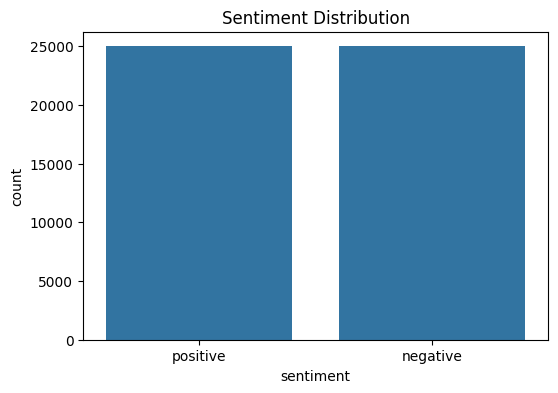

In [ ]:
# Visualize sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the reviews
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [ ]:
# Display the cleaned reviews
print("\nSample Cleaned Reviews:")
print(df['cleaned_review'].head())


Sample Cleaned Reviews:
0    one reviewers mentioned watching oz episode yo...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: cleaned_review, dtype: object


In [ ]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
 # Convert sentiments to binary labels
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Logistic Regression model
print("\nTraining Logistic Regression Model...")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


Training Logistic Regression Model...


LogisticRegression()

In [ ]:
# Evaluate the Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"F1-Score: {f1_log_reg:.2f}")


Logistic Regression Results:
Accuracy: 0.89
F1-Score: 0.89


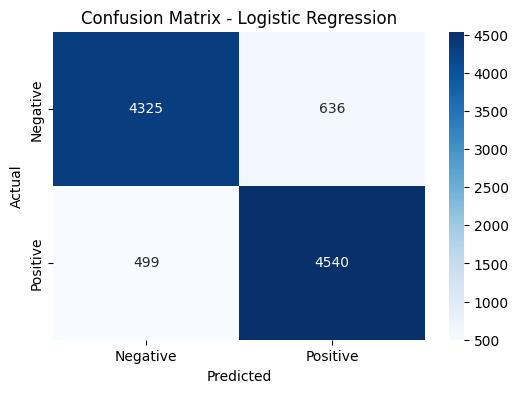

In [ ]:
# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

